In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

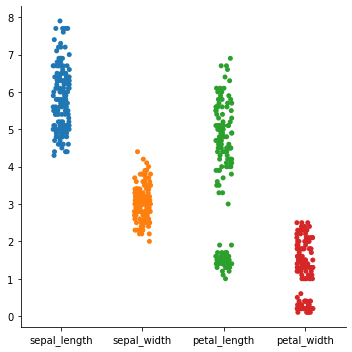

In [2]:
data = sns.load_dataset("iris")
data
data.describe()
sns.catplot(data=data)

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
(dm := data.melt(id_vars="species"))

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


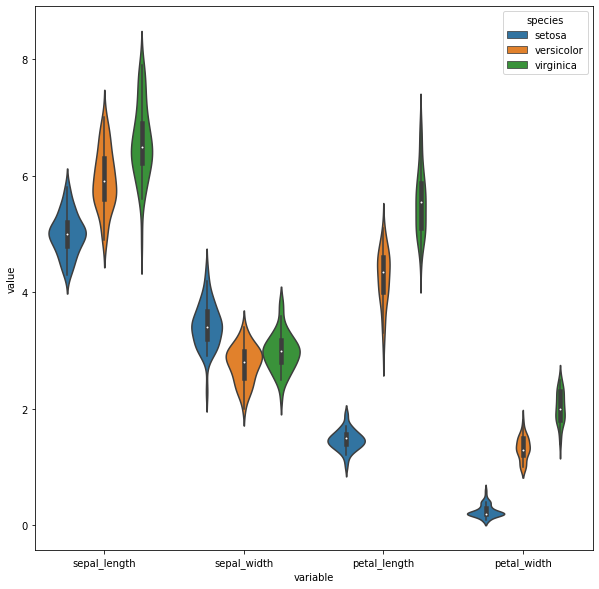

In [5]:
plt.figure(figsize=(10,10))
sns.violinplot(data=dm, x="variable", y="value", hue="species")

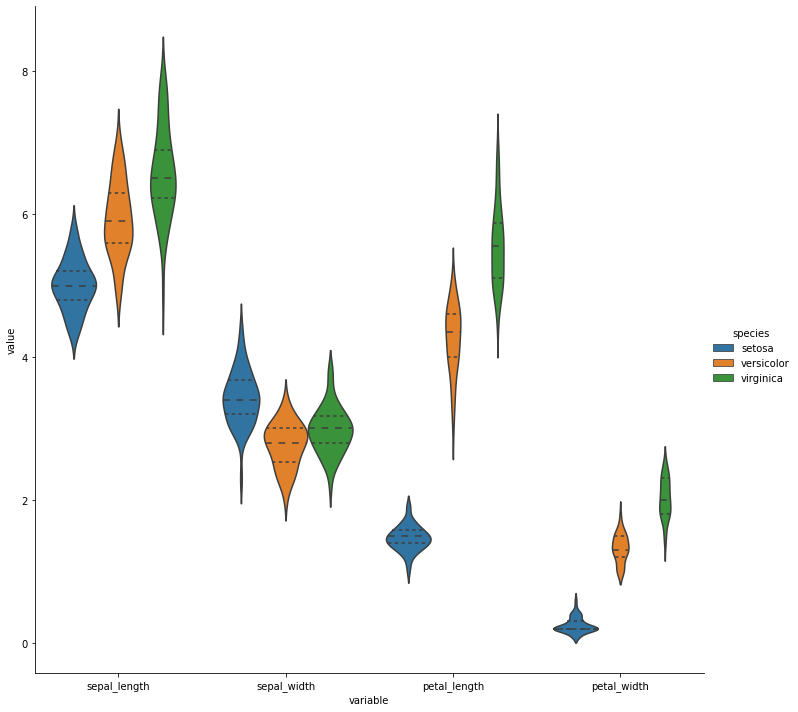

In [6]:
sns.catplot(data=dm, x="variable", y="value", hue="species", kind="violin", inner="quart", height=10)

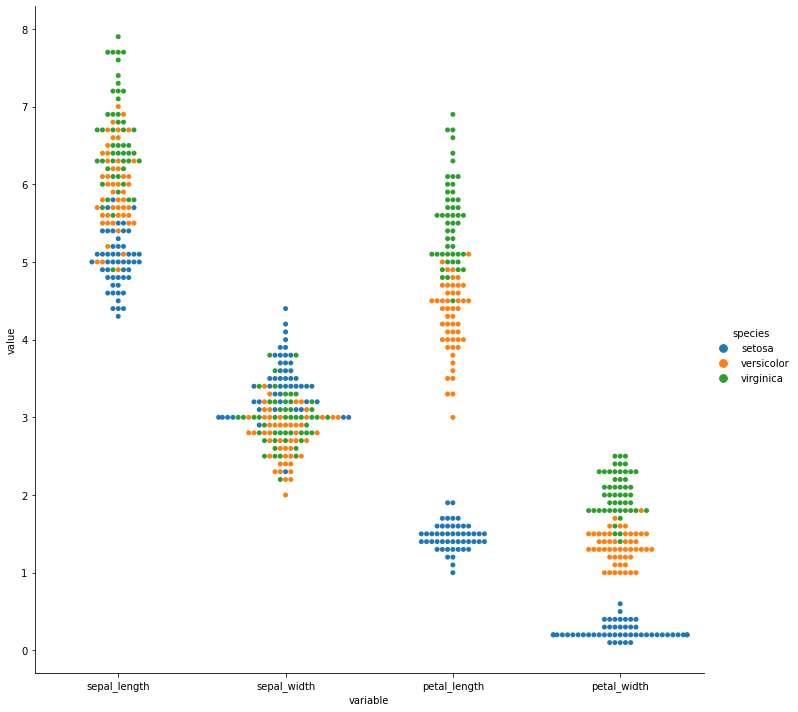

In [7]:
sns.catplot(data=dm, x="variable", y="value", hue="species", kind="swarm", height=10)

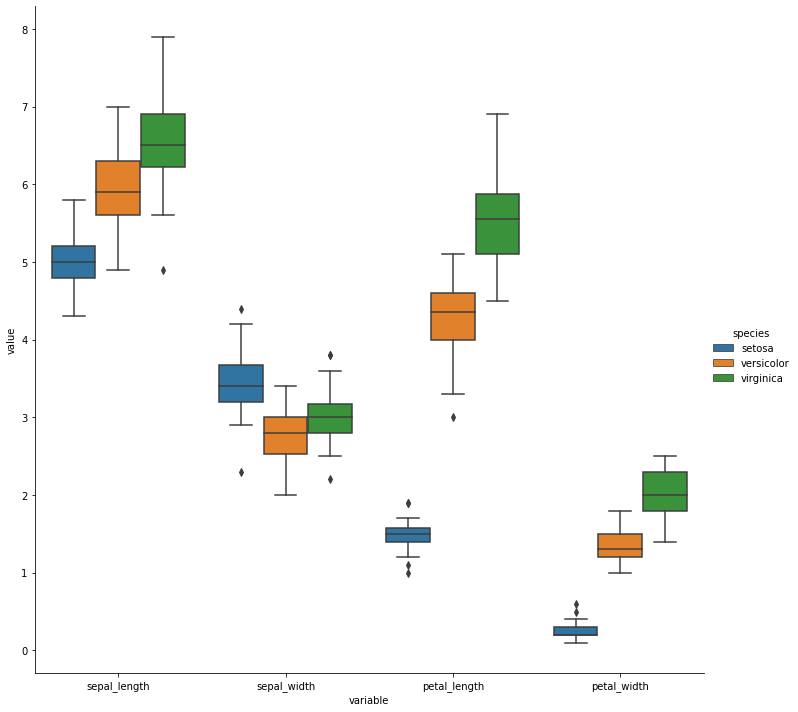

In [8]:
sns.catplot(data=dm, x="variable", y="value", hue="species", kind="box", height=10)

In [9]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


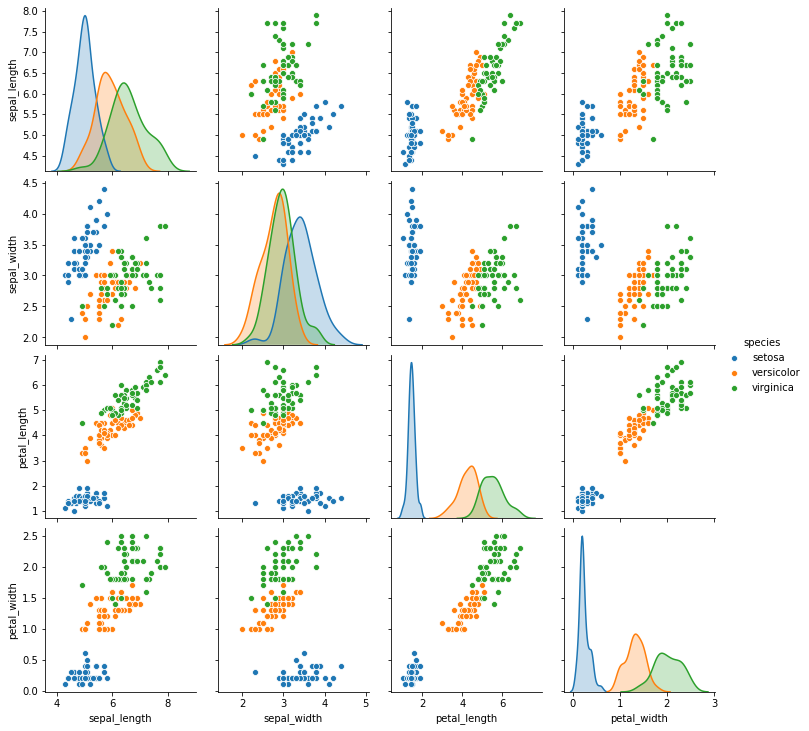

In [10]:
sns.pairplot(data, hue="species")

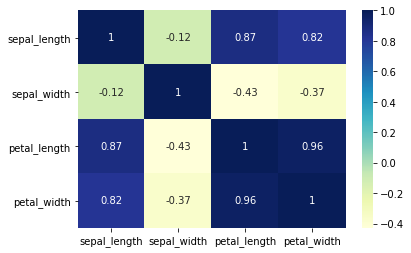

In [11]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [23]:
import numpy as np
x = 50 + 50 * np.random.rand(200)
y = np.pi * x + np.random.randn(200) * 5
(df := pd.DataFrame({"diameter": x, "circumference": y}))

,diameter,circumference
0,86.916964,275.032713
1,66.006350,207.955042
2,82.747708,259.765184
3,81.338317,256.837369
4,78.018305,248.318804
...,...,...
195,77.465894,243.437460
196,59.840364,175.885428
197,60.500090,187.673333
198,74.013946,235.208832


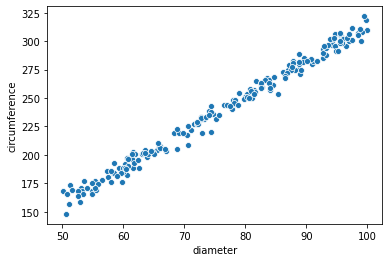

In [26]:
sns.scatterplot(data=df, x="diameter", y="circumference");

In [27]:
df.corr()

,diameter,circumference
diameter,1.000000,0.994403
circumference,0.994403,1.000000


In [30]:
np.polyfit(x,y,1)

array([3.11303217, 2.39990674])

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
print(f"variance: {pca.explained_variance_}, components:{pca.components_}")

variance: [2.33268637e+03 2.19180554e+00], components:[[-0.3030233  -0.95298315]
 [ 0.95298315 -0.3030233 ]]


(47.52023041097732, 102.42521394557117, 139.42360188671177, 330.6465801850864)

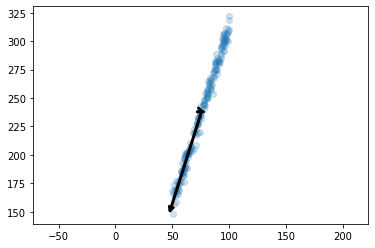

In [35]:
plt.scatter(x, y, alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    plt.annotate('', pca.mean_ + v, pca.mean_,
    arrowprops = dict(arrowstyle='->', linewidth=3))
plt.axis('equal')

In [40]:
pca.components_[0][1]/pca.components_[0][0]

3.1449171035510015

In [44]:
pca = PCA(n_components=1)
pca.fit(df)
print(f"variance: {pca.explained_variance_}, components:{pca.components_}")
pca.transform(df)

variance: [2332.68636831], components:[[-0.3030233  -0.95298315]]


array([[-38.20532776],
       [ 32.05496521],
       [-22.39224809],
       [-19.17501158],
       [-10.05092151],
       [ 48.60926405],
       [ 66.6778462 ],
       [ 16.82015951],
       [ 52.19029824],
       [-30.44974711],
       [ 49.11469356],
       [ 52.28520862],
       [-70.174594  ],
       [-69.01245129],
       [-35.67521531],
       [-46.77536063],
       [ 70.96036878],
       [ 36.09022927],
       [ 34.05729156],
       [-74.95981434],
       [ 51.88319301],
       [ -2.40372751],
       [-67.18946556],
       [ 85.24870179],
       [-45.35120777],
       [  3.05042346],
       [-49.49070641],
       [ 73.77047468],
       [-44.36111457],
       [ 41.83271665],
       [ 39.36617495],
       [ 11.25725393],
       [ 38.9317815 ],
       [ -5.74894126],
       [ 11.89242884],
       [-48.81185038],
       [ 33.22244808],
       [-60.96703654],
       [ 63.31376401],
       [-46.93909631],
       [-65.66343576],
       [ 57.7381869 ],
       [-15.64057868],
       [-70

In [64]:
PCA(n_components=1).fit_transform(df)

array([[-38.20532776],
       [ 32.05496521],
       [-22.39224809],
       [-19.17501158],
       [-10.05092151],
       [ 48.60926405],
       [ 66.6778462 ],
       [ 16.82015951],
       [ 52.19029824],
       [-30.44974711],
       [ 49.11469356],
       [ 52.28520862],
       [-70.174594  ],
       [-69.01245129],
       [-35.67521531],
       [-46.77536063],
       [ 70.96036878],
       [ 36.09022927],
       [ 34.05729156],
       [-74.95981434],
       [ 51.88319301],
       [ -2.40372751],
       [-67.18946556],
       [ 85.24870179],
       [-45.35120777],
       [  3.05042346],
       [-49.49070641],
       [ 73.77047468],
       [-44.36111457],
       [ 41.83271665],
       [ 39.36617495],
       [ 11.25725393],
       [ 38.9317815 ],
       [ -5.74894126],
       [ 11.89242884],
       [-48.81185038],
       [ 33.22244808],
       [-60.96703654],
       [ 63.31376401],
       [-46.93909631],
       [-65.66343576],
       [ 57.7381869 ],
       [-15.64057868],
       [-70

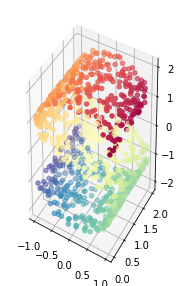

In [109]:
from sklearn.datasets import make_s_curve
from sklearn.manifold import MDS, LocallyLinearEmbedding

X, y = make_s_curve(n_samples=1000, noise=0.0, random_state=None)

plt.figure(figsize=(3, 5))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
plt.show()

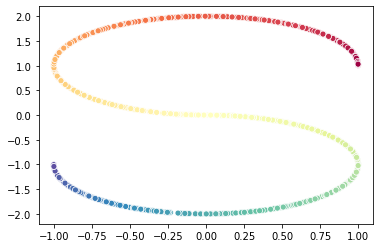

In [76]:
sns.scatterplot(X[:, 0], X[:, 2], hue=y, palette=plt.cm.Spectral, legend=False)

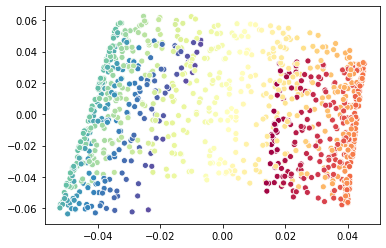

In [85]:
out = LocallyLinearEmbedding(n_neighbors=100, n_components=2).fit_transform(X)
sns.scatterplot(out[:, 0], out[:, 1], hue=y, palette=plt.cm.Spectral, legend=False)

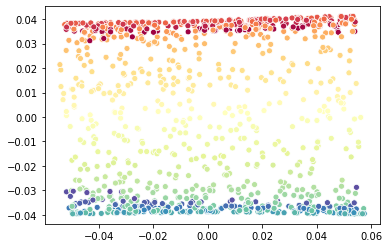

In [89]:
out = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified').fit_transform(X)
sns.scatterplot(out[:, 0], out[:, 1], hue=y, palette=plt.cm.Spectral, legend=False)

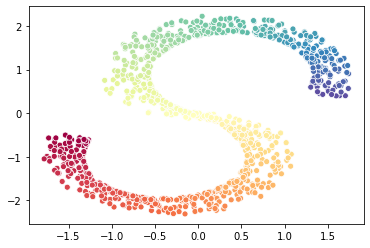

In [90]:
out = MDS(n_components=2).fit_transform(X)
sns.scatterplot(out[:, 0], out[:, 1], hue=y, palette=plt.cm.Spectral, legend=False)

In [110]:
def make_modified_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
X2 = make_modified_s_curve(np.stack((X[:, 0], X[:, 2]), axis=-1))

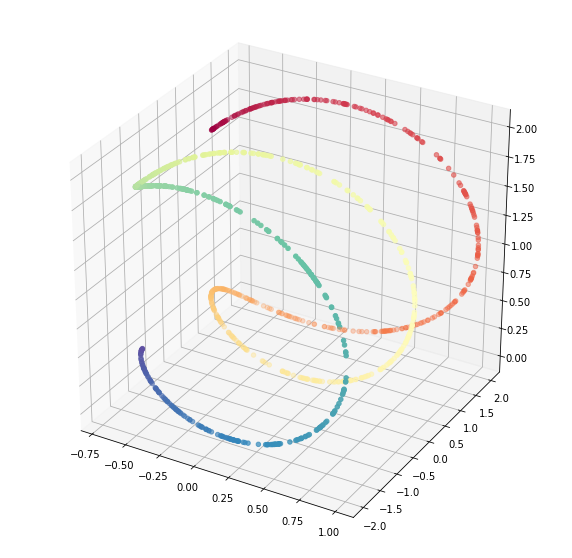

In [111]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2], c=y, cmap=plt.cm.Spectral)
plt.show()

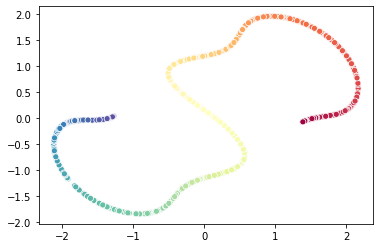

In [113]:
out = MDS(n_components=2).fit_transform(X2)
sns.scatterplot(out[:, 0], out[:, 1], hue=y, palette=plt.cm.Spectral, legend=False)

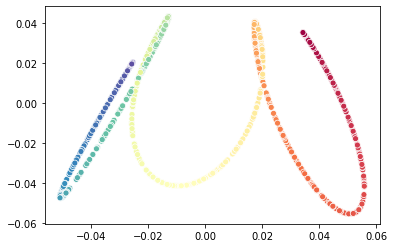

In [115]:
out = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method="modified").fit_transform(X2)
sns.scatterplot(out[:, 0], out[:, 1], hue=y, palette=plt.cm.Spectral, legend=False)